_Reading this on GitHub? [Check out the README in this folder (`/notebooks`)][README]
for instructions on how to run this notebook using the Advanced Analytics Workspace!_

# ESTMA Payments by Entity and Payment Type

[README]: https://github.com/StatCan/hackathon-ginyu-force-data/tree/main/notebooks#running-these-notebooks-on-aaw

In [6]:
import ipywidgets as widgets
import pandas as pd
import plotly.express as px

LBL_ALL_ENT = '(All Entities)'


In [7]:
df = pd.read_csv(
    "https://github.com/StatCan/hackathon-ginyu-force-data/raw/main/estma-payments.csv")
entity_list = sorted(df['entity'].unique())
df.set_index("entity", inplace=True)


In [8]:
per_entity_df = df.groupby([
    'entity',
    'reporting_cycle',
    'payment_category'
]).agg(
    amount_reported_cad=('amount_reported_cad', 'sum')
)

w = widgets.Dropdown(
    options=[LBL_ALL_ENT] + entity_list,
    value=LBL_ALL_ENT,
    description='Entity:',
)
display(w)


Dropdown(description='Entity:', options=('(All Entities)', '11272420 Canada Inc.', '1192090 B.C. Unlimited Lia…

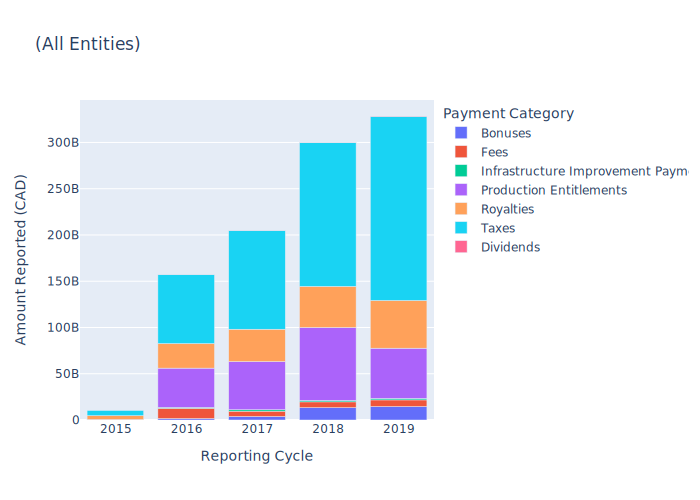

In [9]:
entity_df = per_entity_df.groupby([
    'reporting_cycle',
    'payment_category'
]).agg(
    amount_reported_cad=('amount_reported_cad', 'sum')
) if w.value == LBL_ALL_ENT else per_entity_df.loc[w.value]
entity_df = entity_df.reset_index()

fig = px.bar(
    entity_df,
    x='reporting_cycle',
    y='amount_reported_cad',
    color='payment_category',
    title=w.value,
    labels={
        'reporting_cycle': 'Reporting Cycle',
        'amount_reported_cad': 'Amount Reported (CAD)',
        'payment_category': 'Payment Category'
    }
)

fig.show()
